In [2]:
# import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# file path 
file = 'Data/combined.csv'

# read the data
df = pd.read_csv(file)

df.head()

,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,478,840,468,2160,1665,11872,6095,22710,5684,16497
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,276,813,542,2551,1902,8711,3116,6303,790,2139
2,2,3,Grumpier Old Men (1995),Comedy|Romance,174,777,237,1677,629,6227,774,3440,159,1491
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,48,352,31,497,77,1136,68,557,12,211
4,4,5,Father of the Bride Part II (1995),Comedy,248,802,282,1737,681,6655,761,2989,174,1145


In [4]:
h = df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].std(axis=1, ddof=0) / 4
hard_controversiality = df['movieId'][h.idxmax()]

# Calculate soft controversiality
s = df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].sum(axis=1) / df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].sum().sum()
soft_controversiality = df['movieId'][s.idxmax()]

print('Hard Controversiality:', hard_controversiality)
print('Soft Controversiality:', soft_controversiality)

Hard Controversiality: 318
Soft Controversiality: 318


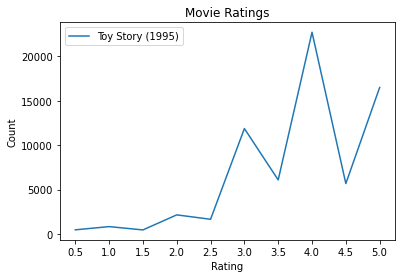

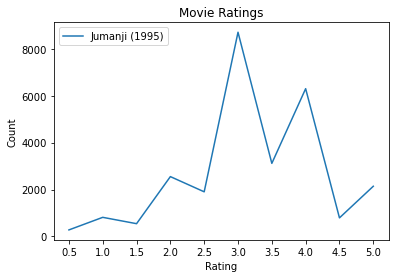

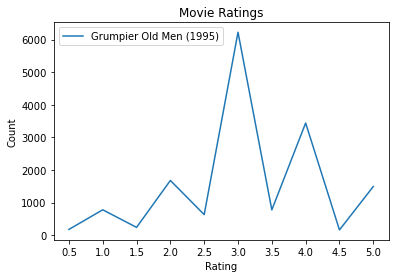

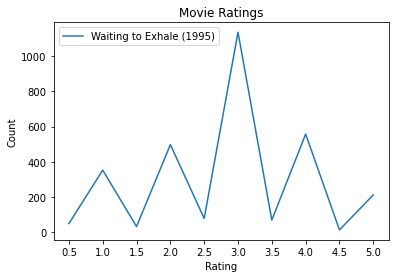

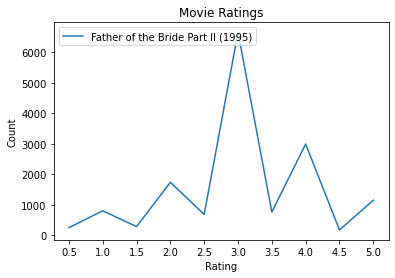

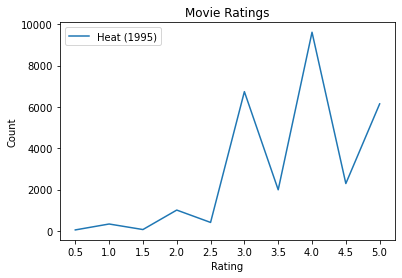

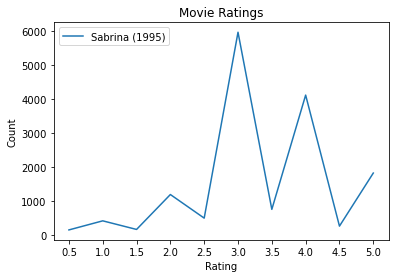

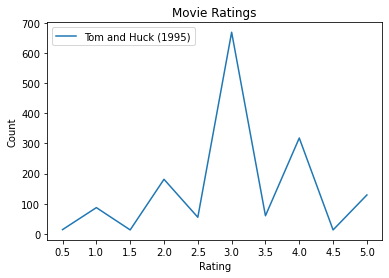

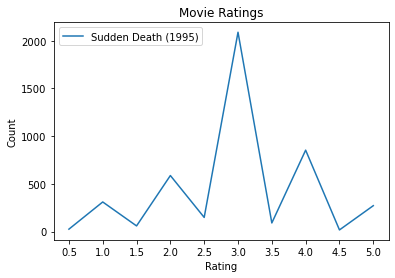

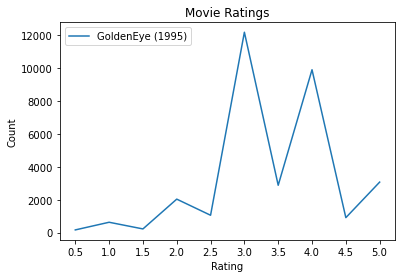

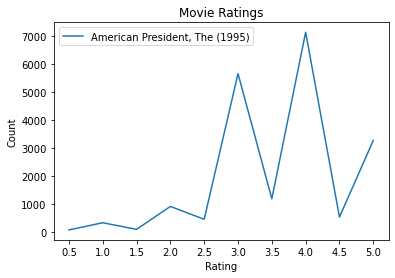

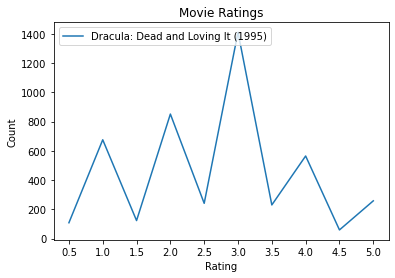

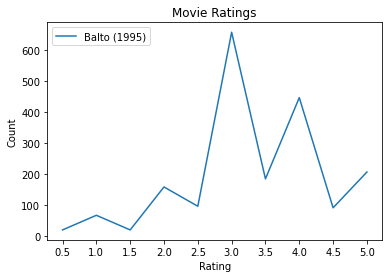

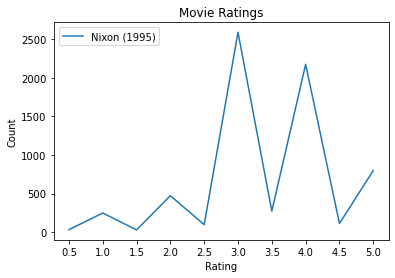

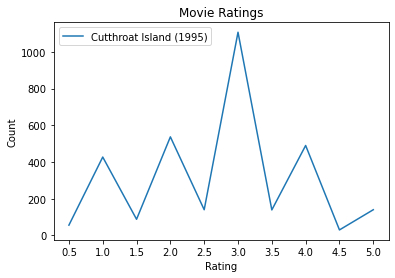

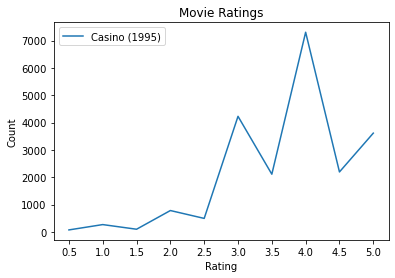

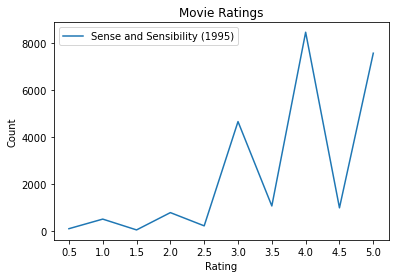

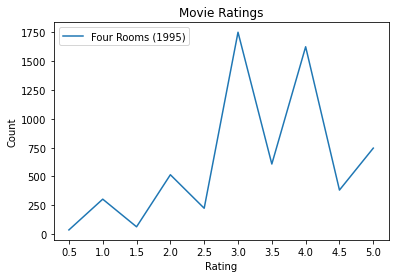

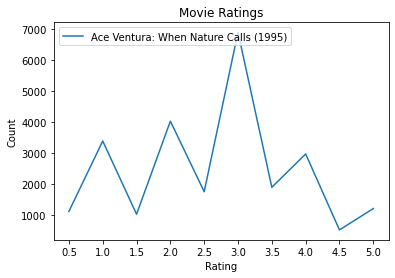

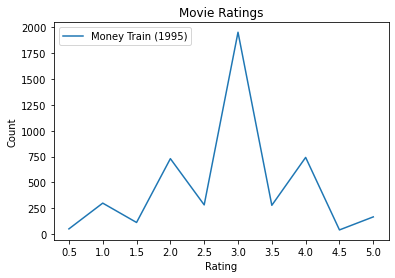

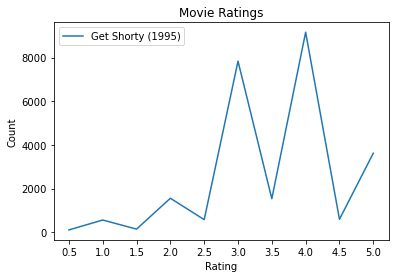

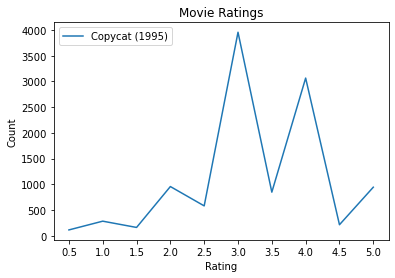

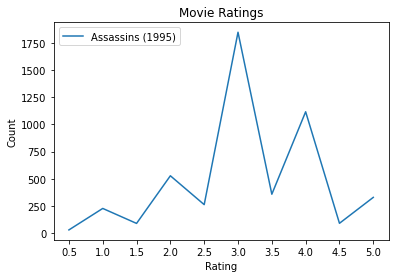

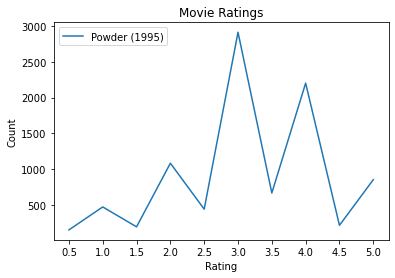

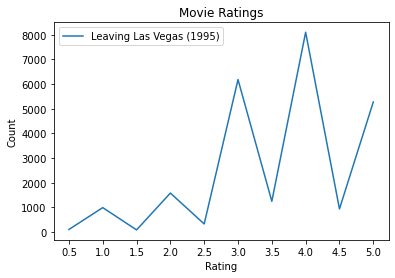

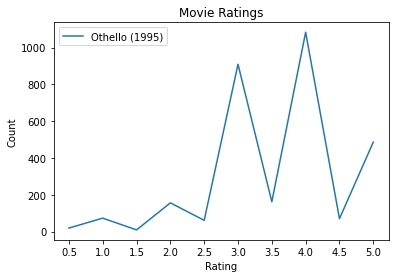

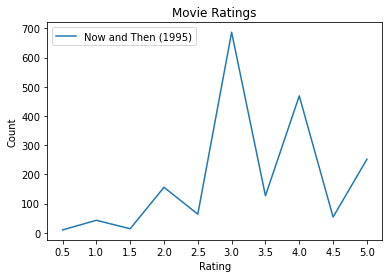

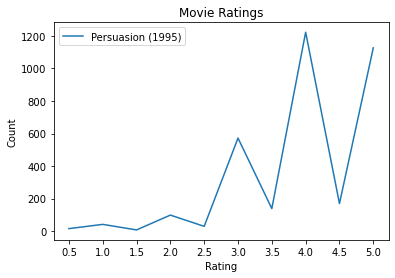

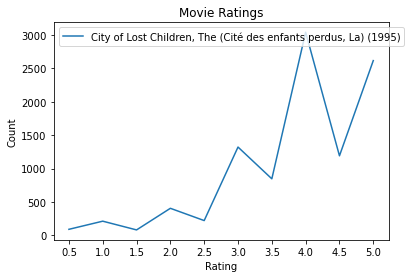

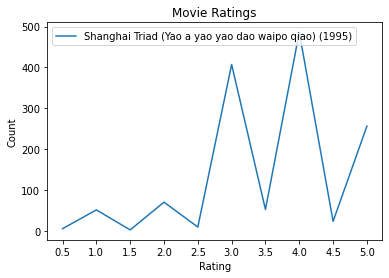

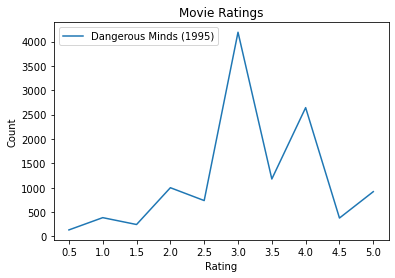

In [10]:
# for each movie in the df make a plot of the count of 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0 ratings
for i in range(0, len(df)):
    plt.plot(df.iloc[i, 4:14], label=df.iloc[i, 2])
    plt.legend(loc='upper left')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Movie Ratings')
    plt.show()
    # stop after 30 plots
    if i == 30:
        break
    



In [6]:
# make a new column of sum of all ratings
df['sum'] = df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].sum(axis=1)

# select movies that have more than 50% of the total ratings as 4.0 or 5.0 ot 1.0 or 0.5
df_polar = df[(df['sum'] * 0.5) < df['4.0'] + df['5.0'] + df['1.0'] + df['0.5']]
df_polar['polarity'] = (df['4.0'] + df['5.0'] - df['1.0'] - df['0.5'])*100 / df['sum']
# only include movies with more than 10000 ratings
df_polar = df_polar[df_polar['sum'] > 10000]
df_polar


# sort the movies by polarity
df_polar.sort_values(by=['polarity'], ascending=False, inplace=True)
df_polar.head(10)


/tmp/ipykernel_45290/1647573012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polar['polarity'] = (df['4.0'] + df['5.0'] - df['1.0'] - df['0.5'])*100 / df['sum']


,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,sum,polarity
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,369,441,224,950,875,5668,4384,22216,14110,48762,97999,71.600731
843,843,858,"Godfather, The (1972)",Crime|Drama,394,532,255,1107,773,4106,3137,13623,8084,28893,60904,68.287797
891,891,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,81,86,46,243,209,1718,1457,6721,2411,6641,19613,67.276806
523,523,527,Schindler's List (1993),Drama|War,496,632,289,1257,884,5846,4196,19002,8720,30194,71516,67.212931
49,49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,209,335,143,814,651,4689,3885,17165,9610,24679,62180,66.420071
895,895,912,Casablanca (1942),Drama|Romance,204,304,146,598,504,2951,1999,8212,3501,12676,31095,65.541084
1195,1195,1221,"Godfather: Part II, The (1974)",Crime|Drama,295,344,134,765,508,3077,2213,9725,5427,16387,38875,65.525402
887,887,904,Rear Window (1954),Mystery|Thriller,148,95,62,246,226,1593,1773,7067,3294,7760,22264,65.504851
952,952,969,"African Queen, The (1951)",Adventure|Comedy|Romance|War,65,107,64,288,198,1505,838,4202,905,3765,11937,65.301164
1169,1169,1193,One Flew Over the Cuckoo's Nest (1975),Drama,175,245,115,618,507,3265,3123,13148,6248,14737,42181,65.112254


In [7]:
# make a dict of titles and thier polarity
polarity_dict = {}
for i in range(0, len(df_polar)):
    polarity_dict[df_polar.iloc[i, 2]] = df_polar.iloc[i, 15]

polarity_dict

# store ipolarity dict as a txt file
with open('Data/polarity_dict.txt', 'w') as file:
    # write each key and value on a different line
    for key, value in polarity_dict.items():
        file.write(str(key) + ':' + str(value) + '\n')


In [14]:
# make a new column for average rating
df_soft = df

df_soft['avg'] = df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].sum(axis=1) / df['sum']

# make a new column for standard deviation of ratings
df_soft['std'] = df[['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']].std(axis=1, ddof=0)

df_soft = df_soft[df_soft['sum'] > 10000]
df_soft.head()

# sort the movies by standard deviation
df_soft.sort_values(by=['std'], ascending=False, inplace=True)

# store the title of these movies in a txt file
with open('Data/soft_controversiality.txt', 'w') as file:

# 

/tmp/ipykernel_45290/782553066.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soft.sort_values(by=['std'], ascending=False, inplace=True)


,Unnamed: 0,movieId,title,genre,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,sum,avg,std
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,369,441,224,950,875,5668,4384,22216,14110,48762,97999,1.0,14708.465667
293,293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,516,2032,310,2573,1003,9609,4596,22604,11705,37458,92406,1.0,11501.028373
352,352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,496,1421,496,2982,1780,12559,6835,27799,10663,32009,97040,1.0,10901.383371
587,587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,611,874,305,1608,1056,8773,5901,28340,10151,30280,87899,1.0,10803.572247
257,257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1002,1284,462,2164,1343,8503,4948,22117,8607,31385,81815,1.0,9924.854168
2487,2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,660,937,575,2154,1796,6914,6807,21760,12816,30126,84545,1.0,9665.328761
523,523,527,Schindler's List (1993),Drama|War,496,632,289,1257,884,5846,4196,19002,8720,30194,71516,1.0,9445.691147
843,843,858,"Godfather, The (1972)",Crime|Drama,394,532,255,1107,773,4106,3137,13623,8084,28893,60904,1.0,8624.611182
49,49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,209,335,143,814,651,4689,3885,17165,9610,24679,62180,1.0,8048.290651
1171,1171,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,775,858,325,1663,947,6534,4113,18302,8166,24139,65822,1.0,7847.287618
